## Decision Tree- Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


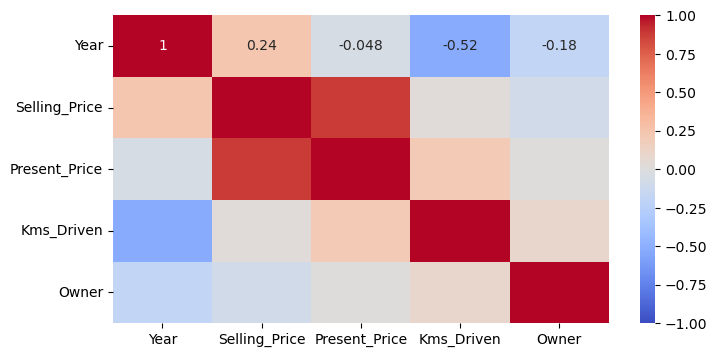

In [9]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df["vehicle_age"]=2022-df.Year

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [13]:
df.select_dtypes("object").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [12]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

# we see how many unique observations the categorical features consist of.
# The number of unique categorical observations of car_name is very high compared to
# the total number of observations in our data.

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [14]:
df.Car_Name.value_counts()

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3

In [15]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

# Although I have 301 observations, there are 98 unique car/engine brands in car_name.
# Converting to numeric data by applying ordinal encoder to this feature will not be a meaningful course of action.
# Because the DT model tends to place more emphasis on high cardinality categorical features
# (features that contain too many unique categorical observations).
# This causes these featurs to come to the fore in feature importance.

# There are also 1-2 of most brands and models. Naturally, we are removing this feature as
# it will not contribute to education.

# Since we have converted the Year feature, which is the year of vehicle production,
# to the Age feature, we are removing the Year feature along with the car_name.

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


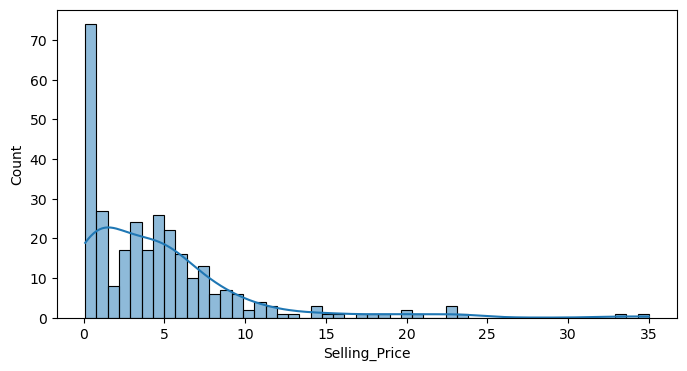

In [17]:
sns.histplot(df.Selling_Price, bins=50, kde=True);

# tree based models are very robust against outliers. However, this is not the case for small regression data.
# Since outlier values in small regression data can seriously increase or decrease the average prices on fallen leaves,
# it is important to reduce these outlier observations, which are insufficient for training, in tree-based models.

# However, as always, we should compare the scores both with the outliers and
# by reducing the outliers and see the differences.

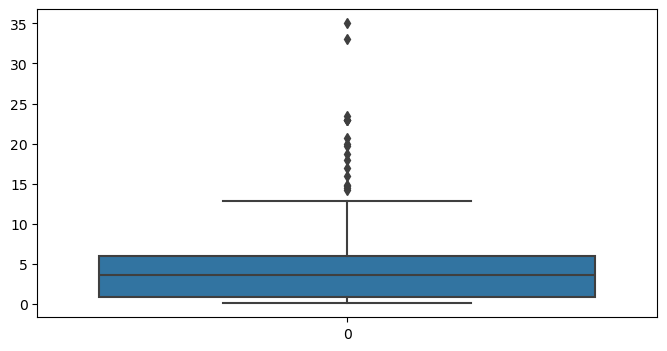

In [18]:
sns.boxplot(df.Selling_Price);

In [19]:
df2 = df.copy()

## Train test split

In [20]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling with Pipeline

In [22]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough',
                                       verbose_feature_names_out=False).set_output(transform="pandas")

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [26]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [27]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# We got our insight that was overfitting. We will make our final decision on the CV.

,train,test
R2,1.0,0.940647
mae,0.0,0.676393
mse,0.0,1.593069
rmse,0.0,1.262168
mape,0.0,0.229744


In [28]:
pd.options.display.float_format = '{:.3f}'.format
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.941
mae,0.000,0.676
mse,0.000,1.593
rmse,0.000,1.262
mape,0.000,0.230


In [29]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# There is over fitting

test_r2                                     0.851
train_r2                                    1.000
test_neg_mean_absolute_error               -0.891
train_neg_mean_absolute_error              -0.000
test_neg_mean_squared_error                -4.466
train_neg_mean_squared_error               -0.000
test_neg_root_mean_squared_error           -1.790
train_neg_root_mean_squared_error          -0.000
test_neg_mean_absolute_percentage_error    -0.207
train_neg_mean_absolute_percentage_error   -0.000
dtype: float64

## Removing Outliers

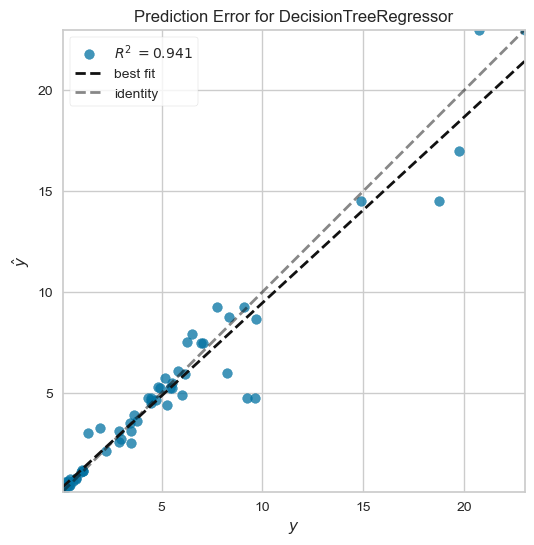

In [30]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

# We found that prices greater than 10 worsened the forecasts.

In [31]:
len(df[df.Selling_Price > 10])

# There are 28 observations over 10 in the data. And since the whole data rate is 9%, we drop it.

28

In [32]:
28/301

0.09302325581395349

In [33]:
df_new = df[df.Selling_Price < 10]
df_new.head()

# We filtered out prices greater than 10

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


In [34]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [36]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [37]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# After filtering, the scores of our test data got better, but the overfiting still could not be fixed.

,train,test
R2,1.000,0.945
mae,0.000,0.410
mse,0.000,0.377
rmse,0.000,0.614
mape,0.000,0.243


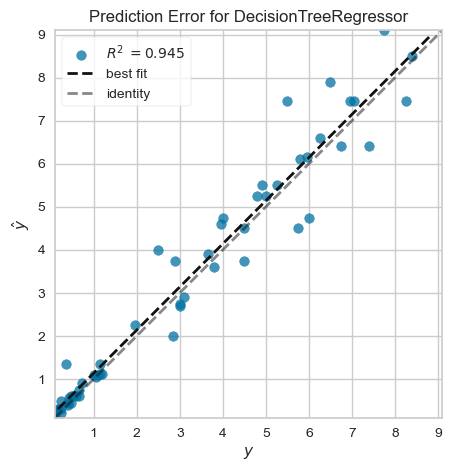

In [38]:
visualizer = RadViz(size=(500, 1000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

# We see here that the scores got better after filtering.

## Visualizing trees

In [39]:
from sklearn.tree import plot_tree

In [40]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()

features

# We keep in mind that the feature order has changed since the make_column_transform function is used in the pipeline.

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [41]:
pipe_model["OrdinalEncoder"].fit_transform(X_train).head()

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
269,2.000,0.000,1.000,10.000,18828,0,7
179,2.000,1.000,1.000,1.050,213000,0,12
261,2.000,0.000,1.000,5.970,5600,0,6
238,2.000,0.000,1.000,9.400,60241,0,9
204,2.000,0.000,1.000,4.430,28282,0,7


In [42]:
X_train.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
269,10.000,18828,Petrol,Dealer,Manual,0,7


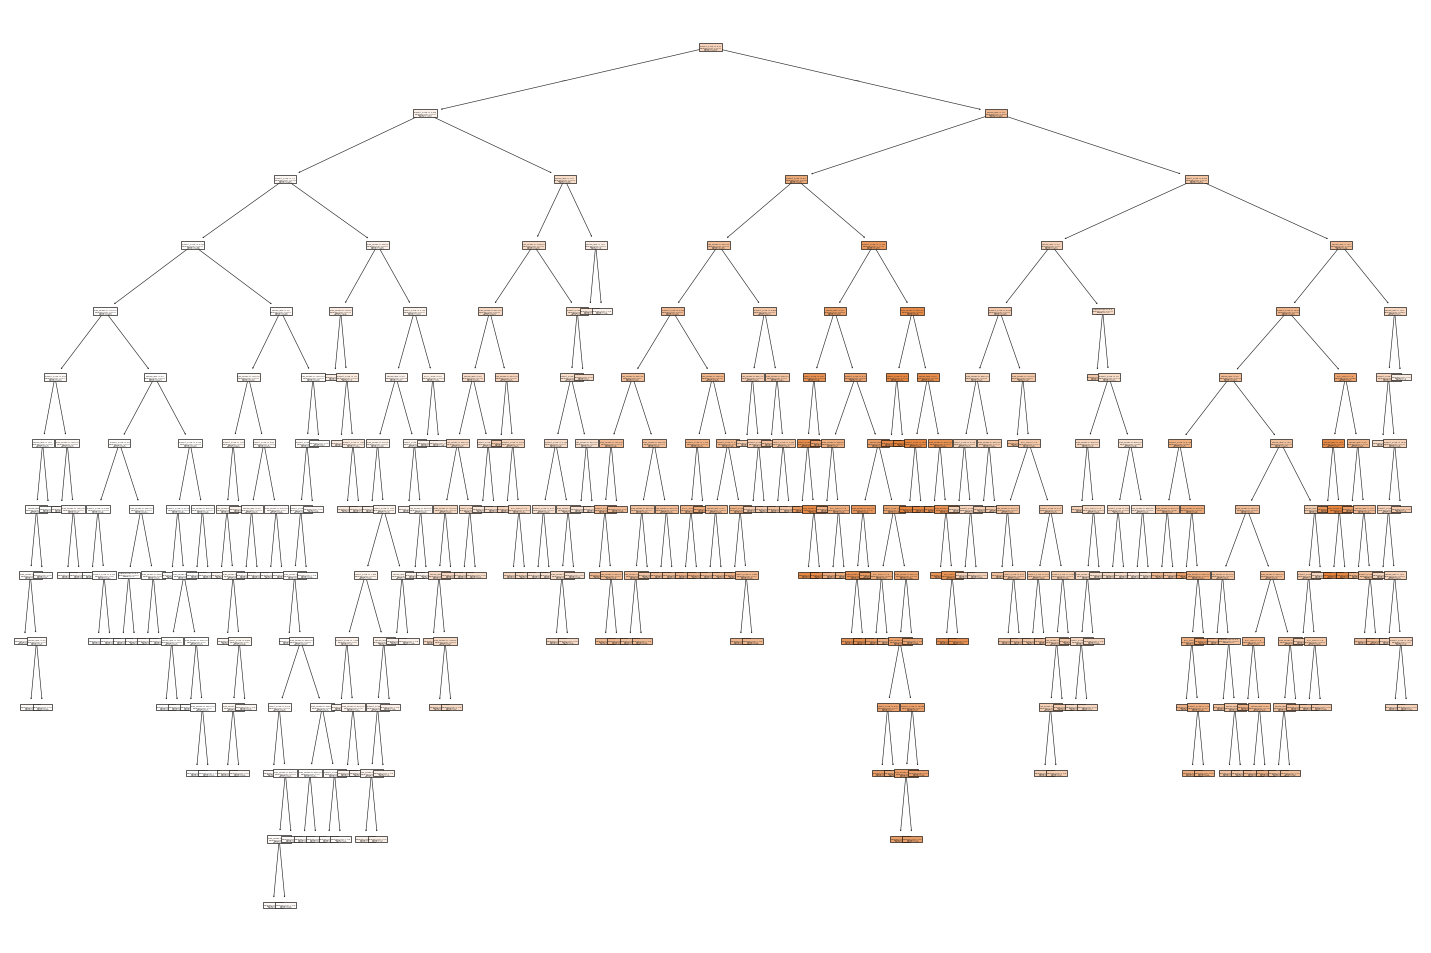

In [43]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=features.tolist()); #feature_names=X.columns

# Branching in regression problems of tree-based models is much more than in classification problems.

In [44]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"],filled=True, feature_names=features.tolist(), fontsize=8); #feature_names=X.columns



      train  test
R2    0.887 0.890
mae   0.578 0.574
mse   0.815 0.754
rmse  0.903 0.868
mape  0.250 0.443




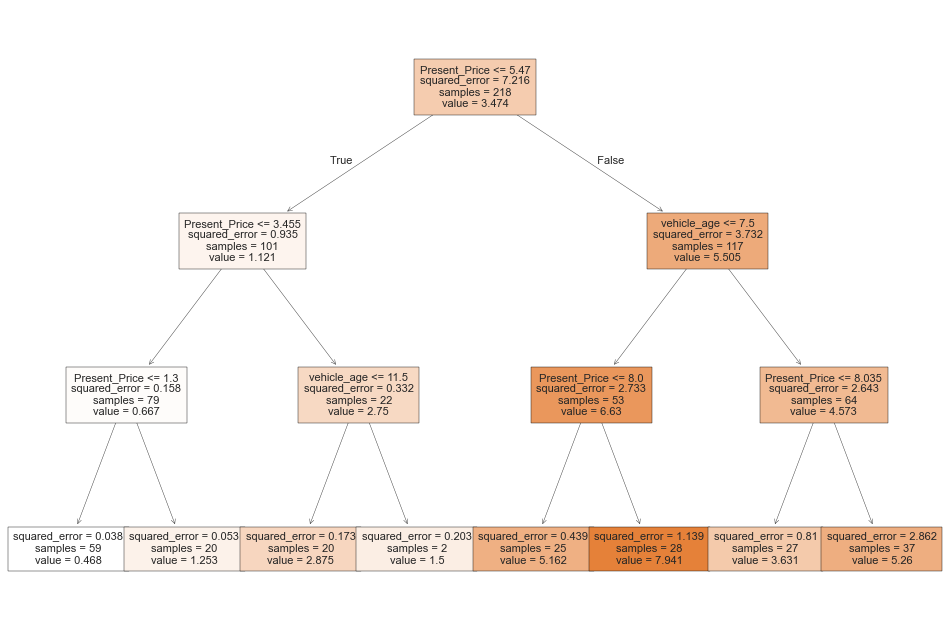

In [45]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(criterion='squared_error',
                                                 max_depth=3,
                                                 random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# The only difference from clasification is criterion='squared_error'. If you remember,
# this hyper_parameter was gini or entropy in clasification.
# In regression, criterion= "squared_error", "friedman_mse", "absolute_error", "poisson"
# can take one of the values. But usually this value is used by default because the model gets
# the best results in "squared_error".

# Squared error represents mean squared error. A leaf's error of 0 indicates that
# all the cars falling on that leaf are of the same price, while a value close to 0 indicates
# that the prices are very close to each other. A high error value indicates that the prices of
# that leaf are very close to each other. indicates that irrelevant cars have crashed.

# sampales shows the total number of observations in the corresponding leaf.

# value shows the average price of the observations in the relevant sheet.

# The value of the leaf on whichever leaf we predict falls on, becomes the value predicted by the model of the car.

## GridSearch

In [46]:
DecisionTreeRegressor?

In [47]:
from sklearn.model_selection import GridSearchCV, validation_curve
from yellowbrick.model_selection import ValidationCurve
from ipywidgets import interact
import ipywidgets as widgets

In [48]:
# Visualization function
def validation_curve(criterion):
  operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(criterion=criterion, random_state=101))]

  pipe_model = Pipeline(steps=operations)

  viz = ValidationCurve(
      pipe_model, param_name="DT_model__ccp_alpha", param_range=np.linspace(0, 0.1, 25),
      logx=False, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
  )

  viz.fit(X_train, y_train)
  viz.show()

# Create a dropdown widget for criterion selection
criterion_widget = widgets.Dropdown(options=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                    value='absolute_error',
                                    description='Criterion:',
                                    disabled=False)

# Use interact to create the interactive widget
interact(validation_curve, criterion=criterion_widget)


interactive(children=(Dropdown(description='Criterion:', index=2, options=('squared_error', 'friedman_mse', 'a…

<function __main__.validation_curve(criterion)>

In [49]:
param_grid = {"DT_model__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "DT_model__ccp_alpha": [.04, .043, .05]}

In [50]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)
grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [51]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('DT_model',
                                        DecisionTreeRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__ccp_alpha': [0.04, 0.043, 0.05],
                         'DT_model__criterion': ['squared_error',
                                                 'friedman_mse',
                                                 'absolute_error', 'poisson']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [52]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model',
                 DecisionTreeRegressor(ccp_alpha=0.043,
                                       criterion='absolute_error',
                                       random_state=101))])

In [53]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]
# overfitting problem is solved

mean_test_score    -0.908
mean_train_score   -0.890
Name: 6, dtype: object

In [54]:
train_val(grid_model, X_train, y_train, X_test, y_test)

# We have seen that the test data scores and the validation set scores from the CV are consistent.

,train,test
R2,0.873,0.884
mae,0.620,0.632
mse,0.914,0.792
rmse,0.956,0.890
mape,0.254,0.440


In [55]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(ccp_alpha=0.043,
                                                 criterion='absolute_error',
                                                 random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.iloc[:,2:]

# We can make a CV to see all metrics.
# When we look at all iterations in the CV, we can see that some scores are very different.
# This is expected for very small data.

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.925,0.908,-0.512,-0.529,-0.411,-0.684,-0.641,-0.827,-0.163,-0.237
2,0.901,0.908,-0.512,-0.521,-0.576,-0.676,-0.759,-0.822,-0.162,-0.236
3,0.713,0.899,-0.996,-0.534,-1.544,-0.747,-1.243,-0.864,-0.367,-0.236
4,0.958,0.880,-0.372,-0.574,-0.308,-0.864,-0.555,-0.929,-0.208,-0.241
5,0.926,0.885,-0.548,-0.560,-0.519,-0.834,-0.720,-0.913,-0.249,-0.241
6,0.878,0.892,-0.757,-0.532,-1.093,-0.759,-1.045,-0.871,-0.331,-0.228
7,0.923,0.868,-0.507,-0.636,-0.512,-0.960,-0.716,-0.980,-0.225,-0.260
8,0.883,0.896,-0.676,-0.565,-0.810,-0.756,-0.900,-0.869,-0.379,-0.227
9,0.848,0.883,-0.724,-0.591,-1.598,-0.803,-1.264,-0.896,-0.214,-0.254
10,0.799,0.881,-0.672,-0.616,-1.520,-0.854,-1.233,-0.924,-0.228,-0.257


In [56]:
df_scores.mean()[2:]

test_r2                                     0.875
train_r2                                    0.890
test_neg_mean_absolute_error               -0.628
train_neg_mean_absolute_error              -0.566
test_neg_mean_squared_error                -0.889
train_neg_mean_squared_error               -0.794
test_neg_root_mean_squared_error           -0.908
train_neg_root_mean_squared_error          -0.890
test_neg_mean_absolute_percentage_error    -0.252
train_neg_mean_absolute_percentage_error   -0.242
dtype: float64

In [57]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.873,0.884
mae,0.620,0.632
mse,0.914,0.792
rmse,0.956,0.890
mape,0.254,0.440


## Feature İmportance

In [58]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(ccp_alpha=0.043,
                                                 criterion='absolute_error',
                                                 random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

# We do not forget that we should use the best hyper parameters we found after gridsearch for feature importance.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model',
                 DecisionTreeRegressor(ccp_alpha=0.043,
                                       criterion='absolute_error',
                                       random_state=101))])

In [59]:
X_train.head(1)

# Since make_colum_transform is used in the pipeline, we do not use feture names here.

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
269,10.000,18828,Petrol,Dealer,Manual,0,7


In [60]:
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [61]:
pipe_model["OrdinalEncoder"].fit_transform(X_train).head()

# After make_colum_transform, we use the features list that shows the feature names of the new df in order.

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
269,2.000,0.000,1.000,10.000,18828,0,7
179,2.000,1.000,1.000,1.050,213000,0,12
261,2.000,0.000,1.000,5.970,5600,0,6
238,2.000,0.000,1.000,9.400,60241,0,9
204,2.000,0.000,1.000,4.430,28282,0,7


In [62]:
df_f_i = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_,
                      index=features,
                      columns=["Feature Importance"])

df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

df_f_i

# As you can see, DT couldn't get any insight from the other features except for the 2 feature.
# Because DT always concentrates on the best features.
# In later iterations we can drop the dominant feature and
# try to see if the dominance comes from high cardinality.

,Feature Importance
Present_Price,0.829
vehicle_age,0.171
Fuel_Type,0.000
Seller_Type,0.000
Transmission,0.000
Kms_Driven,0.000
Owner,0.000


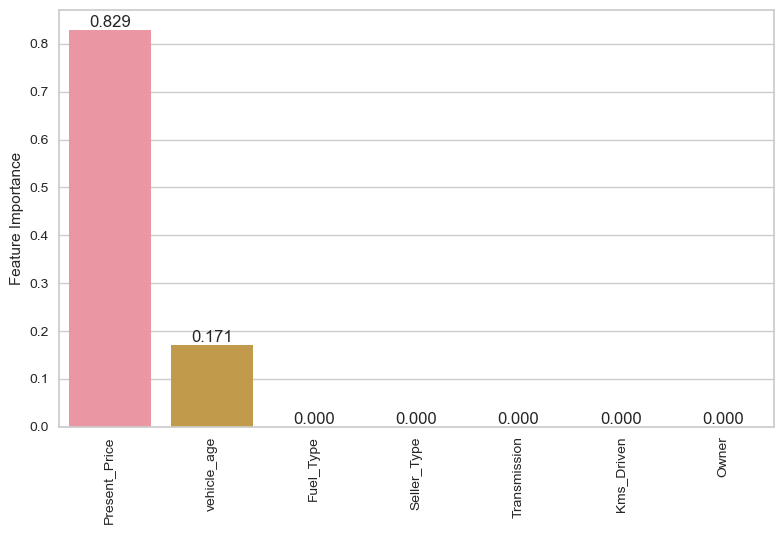

In [63]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

## Compore real and predicted result

In [64]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

# we compare the actual, predicted values ​​with the residuals to see if the model can make the predictions successfully.

In [65]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
200,0.100,0.450,-0.350
271,3.000,4.750,-1.750
223,8.250,7.500,0.750
268,4.800,4.750,0.050
109,1.200,1.250,-0.050
288,8.400,7.500,0.900
60,6.950,4.750,2.200
21,4.900,4.750,0.150
193,0.200,0.450,-0.250
251,5.000,4.750,0.250


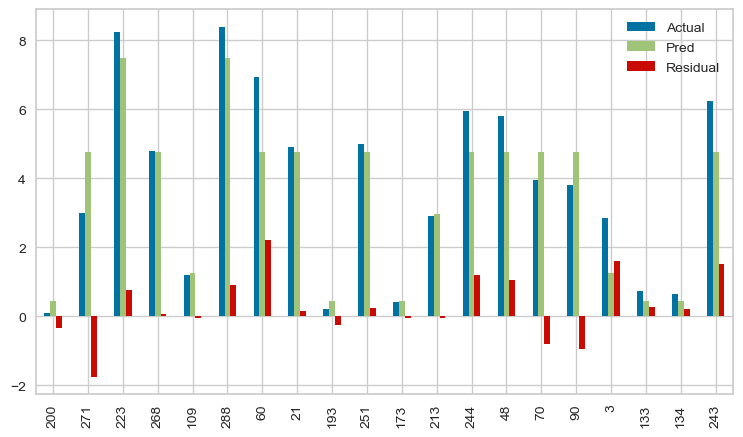

In [66]:
comp_sample.plot(kind='bar',figsize=(9,5))
plt.show()

## Final Model

In [67]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [68]:
from sklearn.pipeline import Pipeline

operations = [("Ordinalcoder", column_trans),
              ("DT_model", DecisionTreeRegressor(ccp_alpha=0.043,
                                                 criterion='absolute_error',
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

# we re-build our final model for all data with the best hyper parameters.

Pipeline(steps=[('Ordinalcoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model',
                 DecisionTreeRegressor(ccp_alpha=0.043,
                                       criterion='absolute_error',
                                       random_state=101))])

## Prediction

In [69]:
X.describe()

,Present_Price,Kms_Driven,Owner,vehicle_age
count,273.000,273.000,273.000,273.000
mean,5.879,36516.941,0.048,8.527
std,4.955,39529.116,0.260,2.943
min,0.320,500.000,0.000,4.000
25%,0.990,15001.000,0.000,6.000
50%,5.700,32000.000,0.000,8.000
75%,8.920,48000.000,0.000,10.000
max,23.730,500000.000,3.000,19.000


In [70]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [71]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.000,25000,Petrol,Dealer,Manual,0,1
1,9.500,44000,Diesel,Individual,Automatic,1,9


In [71]:
pipe_model.predict(df_samples)

array([4.65 , 6.125])